In [107]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#aby sme dosiahli rovnaké výsledky nastavíme seed generátora náhodných čísel, ktorý sa v algoritmoch neurónovej siete využíva na číslo 10 , 
#nejde o to aké je tam číslo hlavné je aby bolo zakaždým spustením rovnaké a to zabezpečí generovanie rovnakej sekvencie náhodných čísiel
np.random.seed(10)
# načíta dataset prostredníctvom knižnice numpy, zadaný je súbor, ktorý sa má načítať a oddeľovač údajov v súbore (,)
dataset = np.loadtxt("PUBG-dataset_top3.csv", delimiter=",")
# do premennej X načíta 4 stĺpce z datasetu a do premennej Y načíta piaty 
X = dataset[:,0:4]
Y = dataset[:,4]
# keďže stĺpce obsahujjú dáta, ktoré majú veľmi odlišné hodnoty (napr. 4000 a 12) je nutné ich škálovať a na to slúži StandardScaler
scaler = StandardScaler()
#vyškáluje hodnoty uložené v X a prepíše nimi pôvodné hodnoty
X=scaler.fit_transform(X)
#vytvorí model, do ktorého sa následne pridajú vrstvy, ktoré budú prepojené
model = Sequential()
#pridá vrstvu triedy Dense s 12 neurónmi, 4 vstupmi (počet stĺpcov X) a aktivačnou funkciou relu
model.add(Dense(12, input_dim=4, activation='relu'))
#pridá vrstvu triedy Dense s 5 neurónmi a aktivačnou funkciou relu
model.add(Dense(5, activation='relu'))
#pridá vrstvu triedy Dense s 1 neurónom a aktivačnou funkciou relu
model.add(Dense(1, activation='relu'))
# skompiluje model ako funkciu na rátanie chyby nastaví mean_squared_error, optimizér adam a ako metriku funkciu binary_accuracy
model.compile(loss="mean_squared_error", optimizer='adam', metrics=['binary_accuracy'])
# nastaví 
history=model.fit(X, Y, validation_split=0.4, epochs=60, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


Train on 297 samples, validate on 199 samples
Epoch 1/60
297/297 [==============================] - 7s 23ms/step - loss: 0.2963 - binary_accuracy: 0.6263 - val_loss: 0.2895 - val_binary_accuracy: 0.5930
Epoch 2/60
297/297 [==============================] - 0s 550us/step - loss: 0.2165 - binary_accuracy: 0.6768 - val_loss: 0.2119 - val_binary_accuracy: 0.7085
Epoch 3/60
297/297 [==============================] - 0s 477us/step - loss: 0.1698 - binary_accuracy: 0.7306 - val_loss: 0.1773 - val_binary_accuracy: 0.7437
Epoch 4/60
297/297 [==============================] - 0s 474us/step - loss: 0.1490 - binary_accuracy: 0.7845 - val_loss: 0.1599 - val_binary_accuracy: 0.7990
Epoch 5/60
297/297 [==============================] - 0s 422us/step - loss: 0.1343 - binary_accuracy: 0.8215 - val_loss: 0.1504 - val_binary_accuracy: 0.8141
Epoch 6/60
297/297 [==============================] - 0s 430us/step - loss: 0.1265 - binary_accuracy: 0.8215 - val_loss: 0.1419 - val_binary_accuracy: 0.8141
Epoch 7

297/297 [==============================] - 0s 625us/step - loss: 0.0888 - binary_accuracy: 0.8721 - val_loss: 0.1003 - val_binary_accuracy: 0.8693
Epoch 53/60
297/297 [==============================] - 0s 448us/step - loss: 0.0883 - binary_accuracy: 0.8687 - val_loss: 0.1000 - val_binary_accuracy: 0.8693
Epoch 54/60
297/297 [==============================] - 0s 464us/step - loss: 0.0882 - binary_accuracy: 0.8721 - val_loss: 0.0999 - val_binary_accuracy: 0.8693
Epoch 55/60
297/297 [==============================] - 0s 467us/step - loss: 0.0885 - binary_accuracy: 0.8687 - val_loss: 0.1004 - val_binary_accuracy: 0.8643
Epoch 56/60
297/297 [==============================] - 0s 451us/step - loss: 0.0886 - binary_accuracy: 0.8620 - val_loss: 0.1004 - val_binary_accuracy: 0.8643
Epoch 57/60
297/297 [==============================] - 0s 506us/step - loss: 0.0877 - binary_accuracy: 0.8653 - val_loss: 0.1002 - val_binary_accuracy: 0.8693
Epoch 58/60
297/297 [==============================] - 0s 

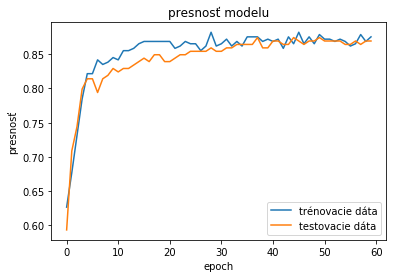

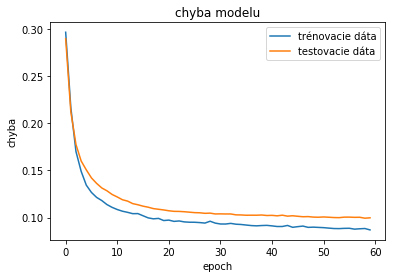

In [108]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('presnosť modelu')
plt.ylabel('presnosť')
plt.xlabel('epoch')
plt.legend(['trénovacie dáta', 'testovacie dáta'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('chyba modelu')
plt.ylabel('chyba')
plt.xlabel('epoch')
plt.legend(['trénovacie dáta', 'testovacie dáta'], loc='upper right')
plt.show()